In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 200
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:09, 11.86it/s]                         


Epoch 1 of 200
Generator loss: 1.22205015, Discriminator loss: 0.93561430


118it [00:10, 11.69it/s]                         


Epoch 2 of 200
Generator loss: 1.70793950, Discriminator loss: 1.26580122


118it [00:10, 11.67it/s]                         


Epoch 3 of 200
Generator loss: 1.74752936, Discriminator loss: 1.44414574


118it [00:09, 11.81it/s]                         


Epoch 4 of 200
Generator loss: 1.86953875, Discriminator loss: 0.90568469


118it [00:10, 11.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


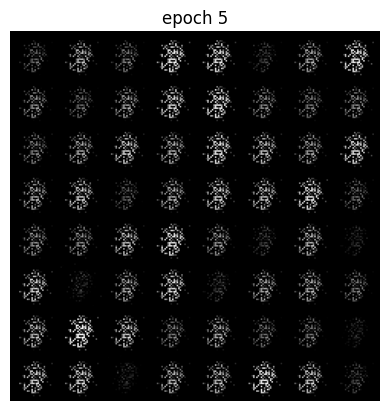

Epoch 5 of 200
Generator loss: 2.05206268, Discriminator loss: 1.05414256


118it [00:09, 11.86it/s]                         


Epoch 6 of 200
Generator loss: 2.64195786, Discriminator loss: 1.03197191


118it [00:09, 11.95it/s]                         


Epoch 7 of 200
Generator loss: 2.35942659, Discriminator loss: 1.12391277


118it [00:09, 11.86it/s]                         


Epoch 8 of 200
Generator loss: 2.03458292, Discriminator loss: 1.32402561


118it [00:09, 11.94it/s]                         


Epoch 9 of 200
Generator loss: 1.06305066, Discriminator loss: 1.29608817


118it [00:09, 12.05it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


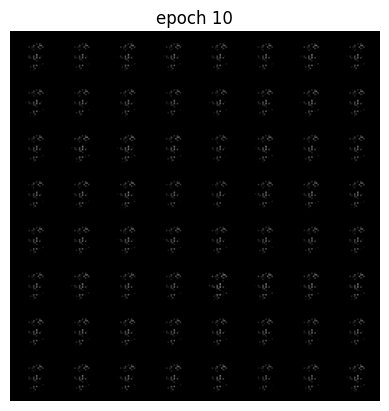

Epoch 10 of 200
Generator loss: 1.25294430, Discriminator loss: 1.19659888


118it [00:09, 12.03it/s]                         


Epoch 11 of 200
Generator loss: 0.95247293, Discriminator loss: 1.14831016


118it [00:09, 12.01it/s]                         


Epoch 12 of 200
Generator loss: 2.15621484, Discriminator loss: 0.91176336


118it [00:09, 12.04it/s]                         


Epoch 13 of 200
Generator loss: 1.29813085, Discriminator loss: 1.14480510


118it [00:09, 11.94it/s]                         


Epoch 14 of 200
Generator loss: 1.40189011, Discriminator loss: 1.07705481


118it [00:09, 11.83it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


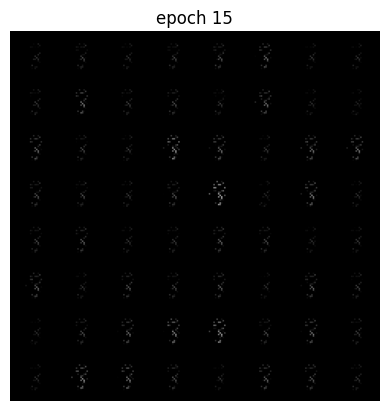

Epoch 15 of 200
Generator loss: 1.43362621, Discriminator loss: 1.09106435


118it [00:10, 11.73it/s]                         


Epoch 16 of 200
Generator loss: 1.52174646, Discriminator loss: 1.03038114


118it [00:10, 11.62it/s]                         


Epoch 17 of 200
Generator loss: 2.66994503, Discriminator loss: 0.93081978


118it [00:10, 11.58it/s]                         


Epoch 18 of 200
Generator loss: 1.63456852, Discriminator loss: 1.34514462


118it [00:09, 11.86it/s]                         


Epoch 19 of 200
Generator loss: 2.49627143, Discriminator loss: 0.76642263


118it [00:10, 11.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


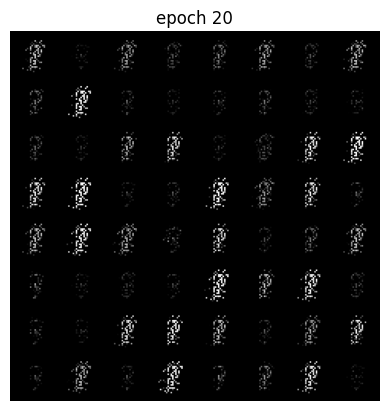

Epoch 20 of 200
Generator loss: 2.83962409, Discriminator loss: 0.77807998


118it [00:10, 11.78it/s]                         


Epoch 21 of 200
Generator loss: 2.37911708, Discriminator loss: 0.71432901


118it [00:10, 11.73it/s]                         


Epoch 22 of 200
Generator loss: 2.25098350, Discriminator loss: 0.75988958


118it [00:10, 11.72it/s]                         


Epoch 23 of 200
Generator loss: 2.46617924, Discriminator loss: 0.61818058


118it [00:09, 11.81it/s]                         


Epoch 24 of 200
Generator loss: 2.86697365, Discriminator loss: 0.60366097


118it [00:09, 11.80it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


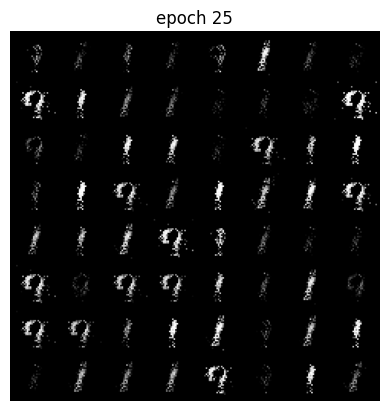

Epoch 25 of 200
Generator loss: 3.14577588, Discriminator loss: 0.49894916


118it [00:10, 11.70it/s]                         


Epoch 26 of 200
Generator loss: 2.69869889, Discriminator loss: 0.58866347


118it [00:10, 11.71it/s]                         


Epoch 27 of 200
Generator loss: 2.33247929, Discriminator loss: 0.62722911


118it [00:10, 11.63it/s]                         


Epoch 28 of 200
Generator loss: 2.00355278, Discriminator loss: 0.70212041


118it [00:10, 11.72it/s]                         


Epoch 29 of 200
Generator loss: 1.97747137, Discriminator loss: 0.73357433


118it [00:10, 11.74it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


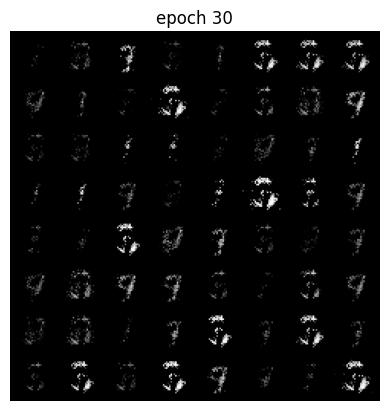

Epoch 30 of 200
Generator loss: 2.35718663, Discriminator loss: 0.50155993


118it [00:10, 11.66it/s]                         


Epoch 31 of 200
Generator loss: 2.76339653, Discriminator loss: 0.49510419


118it [00:10, 11.76it/s]                         


Epoch 32 of 200
Generator loss: 2.87024923, Discriminator loss: 0.54525967


118it [00:10, 11.74it/s]                         


Epoch 33 of 200
Generator loss: 2.52704075, Discriminator loss: 0.54072672


118it [00:10, 11.73it/s]                         


Epoch 34 of 200
Generator loss: 2.83737140, Discriminator loss: 0.42212867


118it [00:10, 11.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


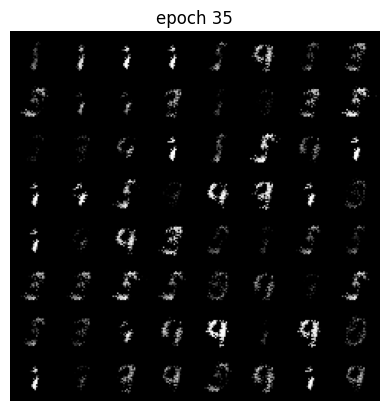

Epoch 35 of 200
Generator loss: 2.67674704, Discriminator loss: 0.59966942


118it [00:10, 11.74it/s]                         


Epoch 36 of 200
Generator loss: 2.51552446, Discriminator loss: 0.62695246


118it [00:10, 11.71it/s]                         


Epoch 37 of 200
Generator loss: 2.65425432, Discriminator loss: 0.52905777


118it [00:10, 11.80it/s]                         


Epoch 38 of 200
Generator loss: 2.58698161, Discriminator loss: 0.51949404


118it [00:10, 11.76it/s]                         


Epoch 39 of 200
Generator loss: 2.21193977, Discriminator loss: 0.70989527


118it [00:10, 11.73it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


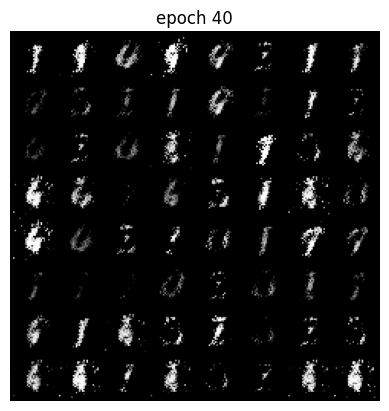

Epoch 40 of 200
Generator loss: 2.41306796, Discriminator loss: 0.59706767


118it [00:09, 11.88it/s]                         


Epoch 41 of 200
Generator loss: 2.51659448, Discriminator loss: 0.51814378


118it [00:09, 11.87it/s]                         


Epoch 42 of 200
Generator loss: 2.68871189, Discriminator loss: 0.54213760


118it [00:09, 11.85it/s]                         


Epoch 43 of 200
Generator loss: 2.45823084, Discriminator loss: 0.56464363


118it [00:09, 11.90it/s]                         


Epoch 44 of 200
Generator loss: 2.65950769, Discriminator loss: 0.60424673


118it [00:09, 11.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


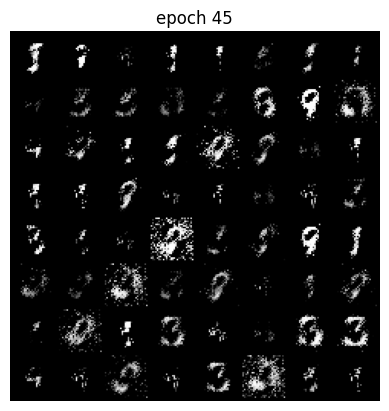

Epoch 45 of 200
Generator loss: 2.79363642, Discriminator loss: 0.46356622


118it [00:10, 11.80it/s]                         


Epoch 46 of 200
Generator loss: 2.95481155, Discriminator loss: 0.48803447


118it [00:10, 11.71it/s]                         


Epoch 47 of 200
Generator loss: 2.93266080, Discriminator loss: 0.48770251


118it [00:09, 11.85it/s]                         


Epoch 48 of 200
Generator loss: 3.12568593, Discriminator loss: 0.47647724


118it [00:10, 11.73it/s]                         


Epoch 49 of 200
Generator loss: 2.93044564, Discriminator loss: 0.51306296


118it [00:10, 11.69it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


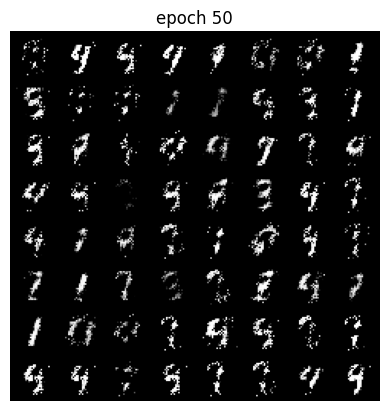

Epoch 50 of 200
Generator loss: 2.96598360, Discriminator loss: 0.50561237


118it [00:10, 11.78it/s]                         


Epoch 51 of 200
Generator loss: 2.96641622, Discriminator loss: 0.49200438


118it [00:10, 11.80it/s]                         


Epoch 52 of 200
Generator loss: 3.10682588, Discriminator loss: 0.41793468


118it [00:09, 11.84it/s]                         


Epoch 53 of 200
Generator loss: 3.17562111, Discriminator loss: 0.42766357


118it [00:10, 11.70it/s]                         


Epoch 54 of 200
Generator loss: 2.86826758, Discriminator loss: 0.55296440


118it [00:10, 11.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


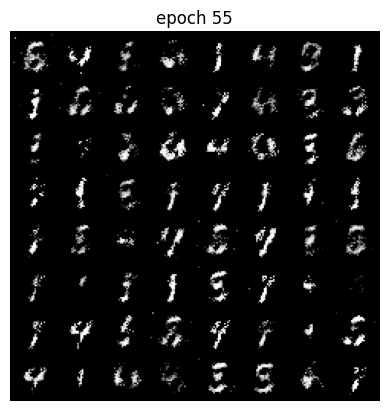

Epoch 55 of 200
Generator loss: 2.52468931, Discriminator loss: 0.61116761


118it [00:10, 11.78it/s]                         


Epoch 56 of 200
Generator loss: 2.56136989, Discriminator loss: 0.57033233


118it [00:10, 11.78it/s]                         


Epoch 57 of 200
Generator loss: 2.67235784, Discriminator loss: 0.51666746


118it [00:10, 11.76it/s]                         


Epoch 58 of 200
Generator loss: 2.80152947, Discriminator loss: 0.51496207


118it [00:09, 11.81it/s]                         


Epoch 59 of 200
Generator loss: 2.48671597, Discriminator loss: 0.61150385


118it [00:10, 11.74it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


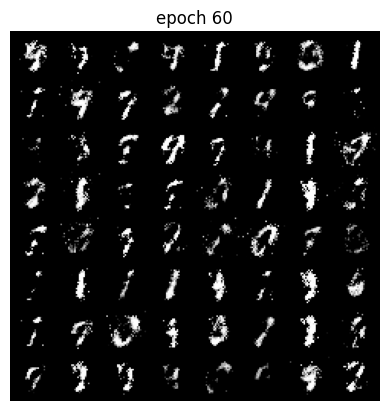

Epoch 60 of 200
Generator loss: 2.60560837, Discriminator loss: 0.56454429


118it [00:09, 11.80it/s]                         


Epoch 61 of 200
Generator loss: 2.63737714, Discriminator loss: 0.62510560


118it [00:09, 11.83it/s]                         


Epoch 62 of 200
Generator loss: 2.44468226, Discriminator loss: 0.58653006


118it [00:10, 11.80it/s]                         


Epoch 63 of 200
Generator loss: 2.61517747, Discriminator loss: 0.51831098


118it [00:09, 11.90it/s]                         


Epoch 64 of 200
Generator loss: 2.67288147, Discriminator loss: 0.52453558


118it [00:09, 11.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


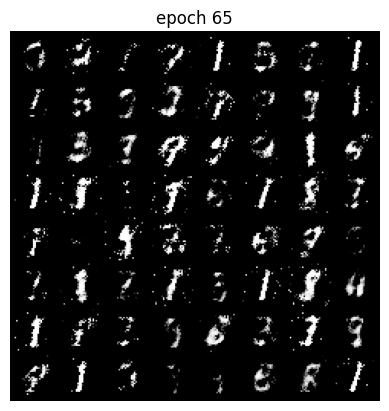

Epoch 65 of 200
Generator loss: 2.73363392, Discriminator loss: 0.53701326


118it [00:09, 11.87it/s]                         


Epoch 66 of 200
Generator loss: 2.69840103, Discriminator loss: 0.54186771


118it [00:09, 11.97it/s]                         


Epoch 67 of 200
Generator loss: 2.55516549, Discriminator loss: 0.58419993


118it [00:09, 11.97it/s]                         


Epoch 68 of 200
Generator loss: 2.59639796, Discriminator loss: 0.53109542


118it [00:09, 11.95it/s]                         


Epoch 69 of 200
Generator loss: 2.47280307, Discriminator loss: 0.57911160


118it [00:09, 11.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


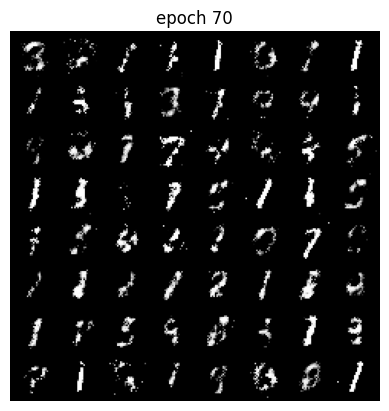

Epoch 70 of 200
Generator loss: 2.46276437, Discriminator loss: 0.57034847


118it [00:09, 11.96it/s]                         


Epoch 71 of 200
Generator loss: 2.56138844, Discriminator loss: 0.56542995


118it [00:10, 11.79it/s]                         


Epoch 72 of 200
Generator loss: 2.40606549, Discriminator loss: 0.64134220


118it [00:09, 11.93it/s]                         


Epoch 73 of 200
Generator loss: 2.35612863, Discriminator loss: 0.65010126


118it [00:09, 11.91it/s]                         


Epoch 74 of 200
Generator loss: 2.28421920, Discriminator loss: 0.63986566


118it [00:09, 11.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


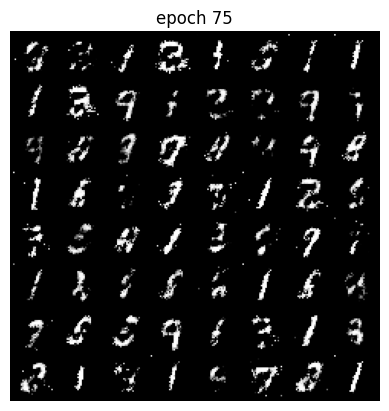

Epoch 75 of 200
Generator loss: 2.30016927, Discriminator loss: 0.64118343


118it [00:09, 11.93it/s]                         


Epoch 76 of 200
Generator loss: 2.36122914, Discriminator loss: 0.65953314


118it [00:09, 11.94it/s]                         


Epoch 77 of 200
Generator loss: 2.30779764, Discriminator loss: 0.62090394


118it [00:10, 11.70it/s]                         


Epoch 78 of 200
Generator loss: 2.27890729, Discriminator loss: 0.68893066


118it [00:09, 11.89it/s]                         


Epoch 79 of 200
Generator loss: 2.19048654, Discriminator loss: 0.71386780


118it [00:09, 11.89it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


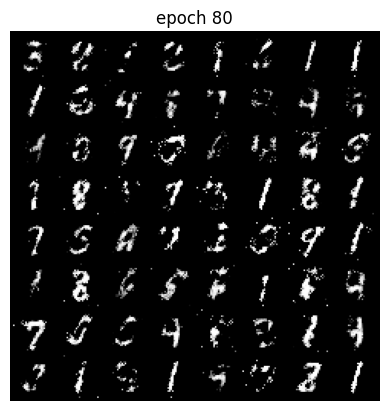

Epoch 80 of 200
Generator loss: 2.05654625, Discriminator loss: 0.74741256


118it [00:09, 11.93it/s]                         


Epoch 81 of 200
Generator loss: 2.16148664, Discriminator loss: 0.72326492


118it [00:09, 11.92it/s]                         


Epoch 82 of 200
Generator loss: 2.20114167, Discriminator loss: 0.68408567


118it [00:09, 11.87it/s]                         


Epoch 83 of 200
Generator loss: 2.24400879, Discriminator loss: 0.64793104


118it [00:09, 11.97it/s]                         


Epoch 84 of 200
Generator loss: 2.25261259, Discriminator loss: 0.66841788


118it [00:09, 12.00it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


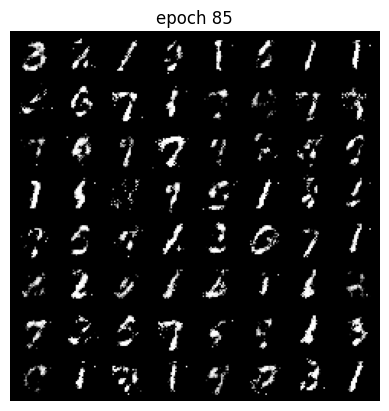

Epoch 85 of 200
Generator loss: 2.23407794, Discriminator loss: 0.69233267


118it [00:09, 12.15it/s]                         


Epoch 86 of 200
Generator loss: 2.10309398, Discriminator loss: 0.73440804


118it [00:09, 12.03it/s]                         


Epoch 87 of 200
Generator loss: 2.09765780, Discriminator loss: 0.73637497


118it [00:09, 12.01it/s]                         


Epoch 88 of 200
Generator loss: 2.03799098, Discriminator loss: 0.73116752


118it [00:09, 11.95it/s]                         


Epoch 89 of 200
Generator loss: 2.08149588, Discriminator loss: 0.72401345


118it [00:09, 12.01it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


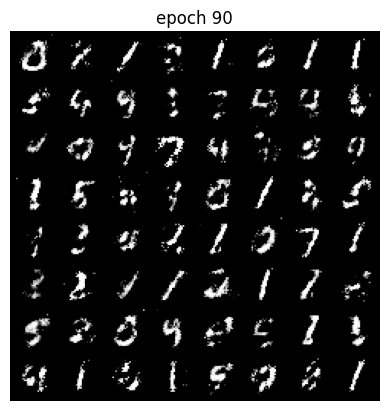

Epoch 90 of 200
Generator loss: 2.03414613, Discriminator loss: 0.74508020


118it [00:09, 12.00it/s]                         


Epoch 91 of 200
Generator loss: 1.96230758, Discriminator loss: 0.75612360


118it [00:09, 11.97it/s]                         


Epoch 92 of 200
Generator loss: 2.03423001, Discriminator loss: 0.76475123


118it [00:09, 11.98it/s]                         


Epoch 93 of 200
Generator loss: 1.90292141, Discriminator loss: 0.80665473


118it [00:09, 11.93it/s]                         


Epoch 94 of 200
Generator loss: 1.92426540, Discriminator loss: 0.80891766


118it [00:09, 11.86it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


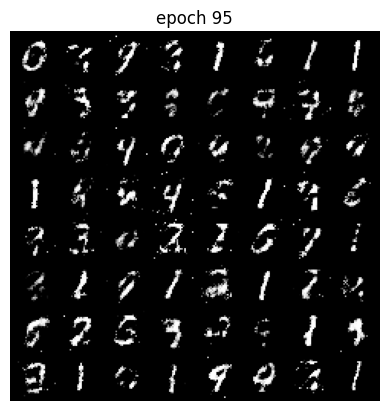

Epoch 95 of 200
Generator loss: 1.91758383, Discriminator loss: 0.79263346


118it [00:09, 11.91it/s]                         


Epoch 96 of 200
Generator loss: 1.95336148, Discriminator loss: 0.79218917


118it [00:09, 11.88it/s]                         


Epoch 97 of 200
Generator loss: 1.98215796, Discriminator loss: 0.78068517


118it [00:09, 11.92it/s]                         


Epoch 98 of 200
Generator loss: 1.73652305, Discriminator loss: 0.85594325


118it [00:09, 11.84it/s]                         


Epoch 99 of 200
Generator loss: 1.79794060, Discriminator loss: 0.82482911


118it [00:09, 11.96it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


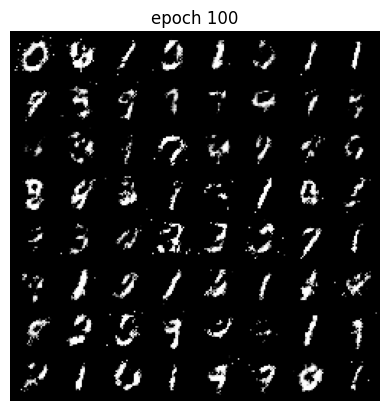

Epoch 100 of 200
Generator loss: 1.81814007, Discriminator loss: 0.83786817


118it [00:09, 11.88it/s]                         


Epoch 101 of 200
Generator loss: 1.96085387, Discriminator loss: 0.79413358


118it [00:09, 11.86it/s]                         


Epoch 102 of 200
Generator loss: 1.93601982, Discriminator loss: 0.79035409


118it [00:09, 11.95it/s]                         


Epoch 103 of 200
Generator loss: 1.83879863, Discriminator loss: 0.82951597


118it [00:09, 12.08it/s]                         


Epoch 104 of 200
Generator loss: 1.77871309, Discriminator loss: 0.84812789


118it [00:09, 12.03it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


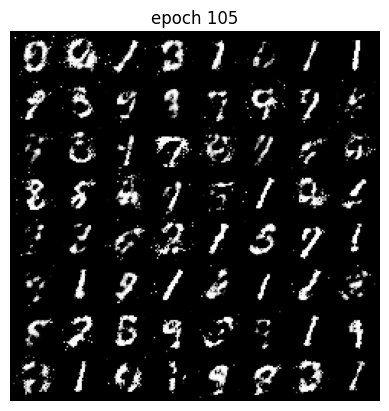

Epoch 105 of 200
Generator loss: 1.75352661, Discriminator loss: 0.86377325


118it [00:09, 11.97it/s]                         


Epoch 106 of 200
Generator loss: 1.72418596, Discriminator loss: 0.86811031


118it [00:09, 12.08it/s]                         


Epoch 107 of 200
Generator loss: 1.77131411, Discriminator loss: 0.85771928


118it [00:09, 11.93it/s]                         


Epoch 108 of 200
Generator loss: 1.83176200, Discriminator loss: 0.84393346


118it [00:09, 12.07it/s]                         


Epoch 109 of 200
Generator loss: 1.76760661, Discriminator loss: 0.85513501


118it [00:09, 12.09it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


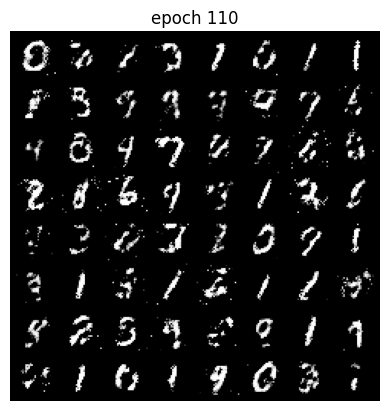

Epoch 110 of 200
Generator loss: 1.79905184, Discriminator loss: 0.84177165


118it [00:09, 12.05it/s]                         


Epoch 111 of 200
Generator loss: 1.74021226, Discriminator loss: 0.86886977


118it [00:09, 11.88it/s]                         


Epoch 112 of 200
Generator loss: 1.77463291, Discriminator loss: 0.86234858


118it [00:09, 12.15it/s]                         


Epoch 113 of 200
Generator loss: 1.69305686, Discriminator loss: 0.88032020


118it [00:09, 12.07it/s]                         


Epoch 114 of 200
Generator loss: 1.73046634, Discriminator loss: 0.86393184


118it [00:09, 12.06it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


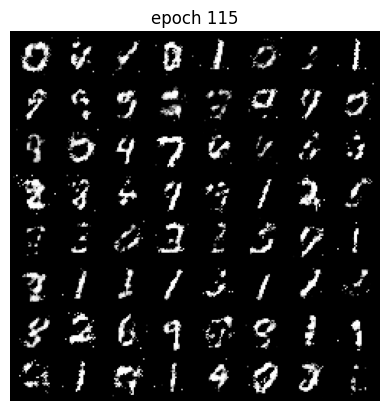

Epoch 115 of 200
Generator loss: 1.78060169, Discriminator loss: 0.86775229


118it [00:09, 11.97it/s]                         


Epoch 116 of 200
Generator loss: 1.77090577, Discriminator loss: 0.85197246


118it [00:09, 12.02it/s]                         


Epoch 117 of 200
Generator loss: 1.75357975, Discriminator loss: 0.86657077


118it [00:09, 12.01it/s]                         


Epoch 118 of 200
Generator loss: 1.76009567, Discriminator loss: 0.84880439


118it [00:09, 12.09it/s]                         


Epoch 119 of 200
Generator loss: 1.74303057, Discriminator loss: 0.87166298


118it [00:09, 12.09it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


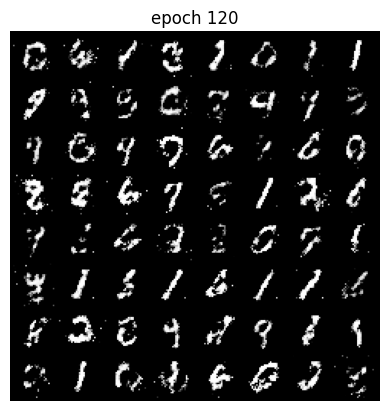

Epoch 120 of 200
Generator loss: 1.67097071, Discriminator loss: 0.89397733


118it [00:09, 12.06it/s]                         


Epoch 121 of 200
Generator loss: 1.66106988, Discriminator loss: 0.89670286


118it [00:09, 12.13it/s]                         


Epoch 122 of 200
Generator loss: 1.61513924, Discriminator loss: 0.91509500


118it [00:09, 12.09it/s]                         


Epoch 123 of 200
Generator loss: 1.59160376, Discriminator loss: 0.91542384


118it [00:09, 12.05it/s]                         


Epoch 124 of 200
Generator loss: 1.65624964, Discriminator loss: 0.88381942


118it [00:09, 12.09it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


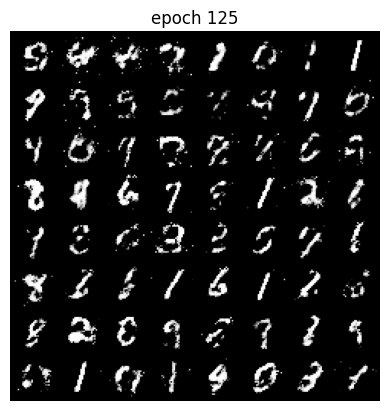

Epoch 125 of 200
Generator loss: 1.68777418, Discriminator loss: 0.89307395


118it [00:09, 12.02it/s]                         


Epoch 126 of 200
Generator loss: 1.64424566, Discriminator loss: 0.90364504


118it [00:09, 12.09it/s]                         


Epoch 127 of 200
Generator loss: 1.67428567, Discriminator loss: 0.89605166


118it [00:09, 12.03it/s]                         


Epoch 128 of 200
Generator loss: 1.61628996, Discriminator loss: 0.91590314


118it [00:09, 12.10it/s]                         


Epoch 129 of 200
Generator loss: 1.61994533, Discriminator loss: 0.90660693


118it [00:10, 11.41it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


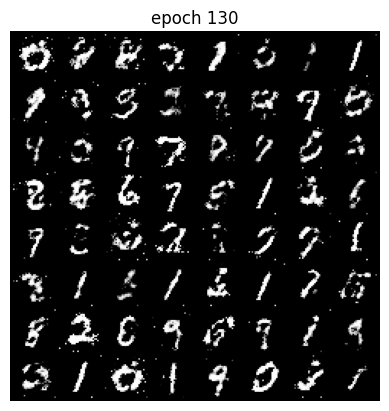

Epoch 130 of 200
Generator loss: 1.64648787, Discriminator loss: 0.89982033


118it [00:09, 12.05it/s]                         


Epoch 131 of 200
Generator loss: 1.56227394, Discriminator loss: 0.97617206


118it [00:09, 12.12it/s]                         


Epoch 132 of 200
Generator loss: 1.50248722, Discriminator loss: 0.94451812


118it [00:09, 12.16it/s]                         


Epoch 133 of 200
Generator loss: 1.54923160, Discriminator loss: 0.93048178


118it [00:09, 12.09it/s]                         


Epoch 134 of 200
Generator loss: 1.60441065, Discriminator loss: 0.91893153


118it [00:09, 12.02it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


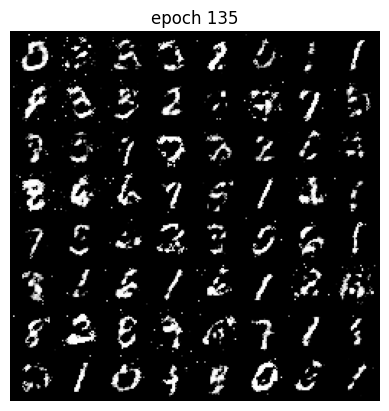

Epoch 135 of 200
Generator loss: 1.60566125, Discriminator loss: 0.92685473


118it [00:09, 12.03it/s]                         


Epoch 136 of 200
Generator loss: 1.56833368, Discriminator loss: 0.92042043


118it [00:09, 12.14it/s]                         


Epoch 137 of 200
Generator loss: 1.58480026, Discriminator loss: 0.94517137


118it [00:09, 11.93it/s]                         


Epoch 138 of 200
Generator loss: 1.53112989, Discriminator loss: 0.96372669


118it [00:09, 11.95it/s]                         


Epoch 139 of 200
Generator loss: 1.48892157, Discriminator loss: 0.97076468


118it [00:09, 11.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


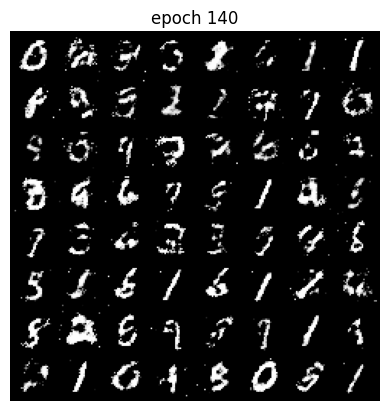

Epoch 140 of 200
Generator loss: 1.55091775, Discriminator loss: 0.92672977


118it [00:09, 11.98it/s]                         


Epoch 141 of 200
Generator loss: 1.62039752, Discriminator loss: 0.93409236


118it [00:09, 11.92it/s]                         


Epoch 142 of 200
Generator loss: 1.51275526, Discriminator loss: 0.98608522


118it [00:09, 12.10it/s]                         


Epoch 143 of 200
Generator loss: 1.51651454, Discriminator loss: 0.93530087


118it [00:09, 12.11it/s]                         


Epoch 144 of 200
Generator loss: 1.57349527, Discriminator loss: 0.95623308


118it [00:09, 11.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


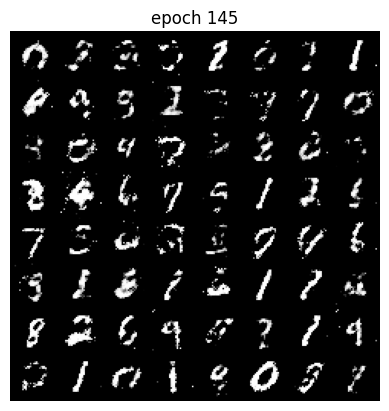

Epoch 145 of 200
Generator loss: 1.54460994, Discriminator loss: 0.92989157


118it [00:09, 12.08it/s]                         


Epoch 146 of 200
Generator loss: 1.60516441, Discriminator loss: 0.92616224


118it [00:09, 12.02it/s]                         


Epoch 147 of 200
Generator loss: 1.58404820, Discriminator loss: 0.93030098


118it [00:09, 11.97it/s]                         


Epoch 148 of 200
Generator loss: 1.51695213, Discriminator loss: 0.94397048


118it [00:09, 12.02it/s]                         


Epoch 149 of 200
Generator loss: 1.48881634, Discriminator loss: 0.97172387


118it [00:09, 12.05it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


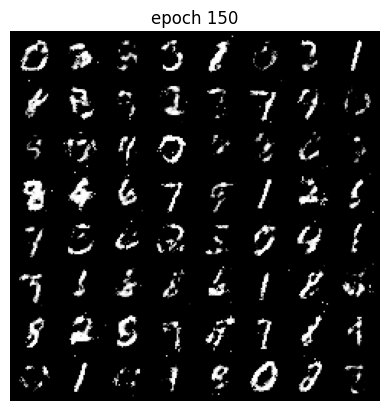

Epoch 150 of 200
Generator loss: 1.50990847, Discriminator loss: 0.96680043


118it [00:09, 11.99it/s]                         


Epoch 151 of 200
Generator loss: 1.50696560, Discriminator loss: 0.97653824


118it [00:09, 12.17it/s]                         


Epoch 152 of 200
Generator loss: 1.46970369, Discriminator loss: 0.97704312


118it [00:09, 12.03it/s]                         


Epoch 153 of 200
Generator loss: 1.41869649, Discriminator loss: 1.00409677


118it [00:09, 12.07it/s]                         


Epoch 154 of 200
Generator loss: 1.46431852, Discriminator loss: 0.98492939


118it [00:09, 12.04it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


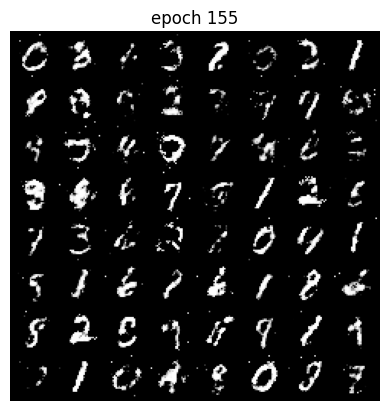

Epoch 155 of 200
Generator loss: 1.38535566, Discriminator loss: 1.01086638


118it [00:09, 12.05it/s]                         


Epoch 156 of 200
Generator loss: 1.42581378, Discriminator loss: 0.99272191


118it [00:09, 12.03it/s]                         


Epoch 157 of 200
Generator loss: 1.37786942, Discriminator loss: 1.02450939


118it [00:09, 12.00it/s]                         


Epoch 158 of 200
Generator loss: 1.44459258, Discriminator loss: 1.00202259


118it [00:09, 12.07it/s]                         


Epoch 159 of 200
Generator loss: 1.40897425, Discriminator loss: 0.99600224


118it [00:09, 11.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


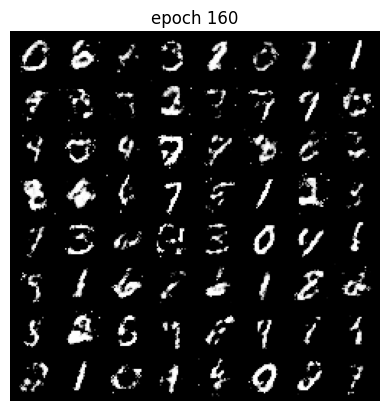

Epoch 160 of 200
Generator loss: 1.43776970, Discriminator loss: 1.00591627


118it [00:09, 12.10it/s]                         


Epoch 161 of 200
Generator loss: 1.36826762, Discriminator loss: 1.03536299


118it [00:09, 12.03it/s]                         


Epoch 162 of 200
Generator loss: 1.36354503, Discriminator loss: 1.02192645


118it [00:09, 11.81it/s]                         


Epoch 163 of 200
Generator loss: 1.45984809, Discriminator loss: 0.99279938


118it [00:09, 11.86it/s]                         


Epoch 164 of 200
Generator loss: 1.36139188, Discriminator loss: 1.01205120


118it [00:09, 11.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


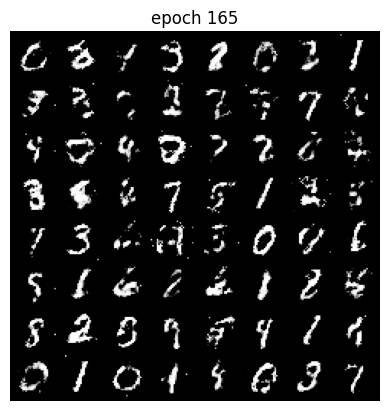

Epoch 165 of 200
Generator loss: 1.45457239, Discriminator loss: 0.99294107


118it [00:10, 11.78it/s]                         


Epoch 166 of 200
Generator loss: 1.41927553, Discriminator loss: 1.00319287


118it [00:09, 11.92it/s]                         


Epoch 167 of 200
Generator loss: 1.37360262, Discriminator loss: 1.04193868


118it [00:10, 11.36it/s]                         


Epoch 168 of 200
Generator loss: 1.35871615, Discriminator loss: 1.03340638


118it [00:10, 11.25it/s]                         


Epoch 169 of 200
Generator loss: 1.36882674, Discriminator loss: 1.02983497


118it [00:10, 11.67it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


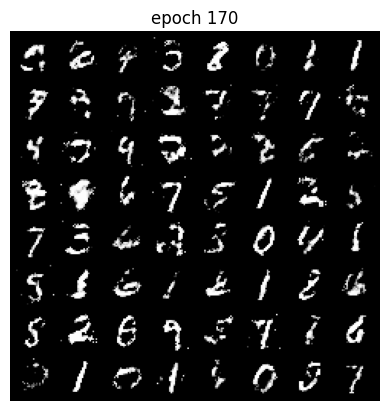

Epoch 170 of 200
Generator loss: 1.33876440, Discriminator loss: 1.04812088


118it [00:09, 11.86it/s]                         


Epoch 171 of 200
Generator loss: 1.35141926, Discriminator loss: 1.03569198


118it [00:10, 11.72it/s]                         


Epoch 172 of 200
Generator loss: 1.37105427, Discriminator loss: 1.03637340


118it [00:10, 11.18it/s]                         


Epoch 173 of 200
Generator loss: 1.33822578, Discriminator loss: 1.05131796


118it [00:10, 11.78it/s]                         


Epoch 174 of 200
Generator loss: 1.39443526, Discriminator loss: 1.02605706


118it [00:10, 11.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


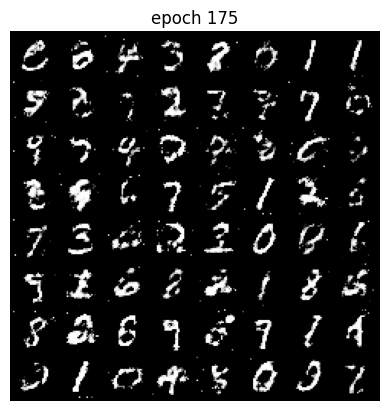

Epoch 175 of 200
Generator loss: 1.34543307, Discriminator loss: 1.04600366


118it [00:10, 10.88it/s]                         


Epoch 176 of 200
Generator loss: 1.32521127, Discriminator loss: 1.05171590


118it [00:09, 11.93it/s]                         


Epoch 177 of 200
Generator loss: 1.33164837, Discriminator loss: 1.05321631


118it [00:10, 11.77it/s]                         


Epoch 178 of 200
Generator loss: 1.27583804, Discriminator loss: 1.06575208


118it [00:10, 11.33it/s]                         


Epoch 179 of 200
Generator loss: 1.28169368, Discriminator loss: 1.07263237


118it [00:09, 12.21it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


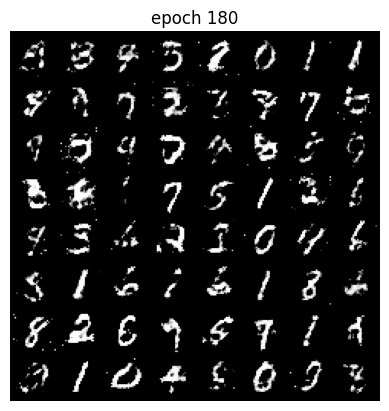

Epoch 180 of 200
Generator loss: 1.30342119, Discriminator loss: 1.06358466


118it [00:09, 12.18it/s]                         


Epoch 181 of 200
Generator loss: 1.29513629, Discriminator loss: 1.06193157


118it [00:10, 11.64it/s]                         


Epoch 182 of 200
Generator loss: 1.29770965, Discriminator loss: 1.07970179


118it [00:09, 12.29it/s]                         


Epoch 183 of 200
Generator loss: 1.28365777, Discriminator loss: 1.06211824


118it [00:09, 12.22it/s]                         


Epoch 184 of 200
Generator loss: 1.33370388, Discriminator loss: 1.04767371


118it [00:09, 12.32it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


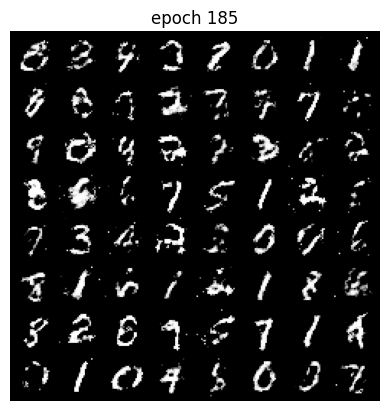

Epoch 185 of 200
Generator loss: 1.33289561, Discriminator loss: 1.06303461


118it [00:09, 12.31it/s]                         


Epoch 186 of 200
Generator loss: 1.25978592, Discriminator loss: 1.09459731


118it [00:09, 12.34it/s]                         


Epoch 187 of 200
Generator loss: 1.31562464, Discriminator loss: 1.06940588


118it [00:09, 12.33it/s]                         


Epoch 188 of 200
Generator loss: 1.30759695, Discriminator loss: 1.06079321


118it [00:09, 12.36it/s]                         


Epoch 189 of 200
Generator loss: 1.31529276, Discriminator loss: 1.06186554


118it [00:09, 12.32it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


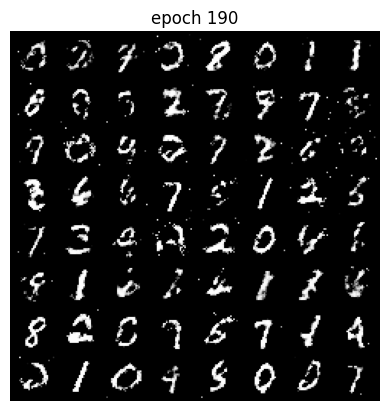

Epoch 190 of 200
Generator loss: 1.36834047, Discriminator loss: 1.05665451


118it [00:09, 12.34it/s]                         


Epoch 191 of 200
Generator loss: 1.28948815, Discriminator loss: 1.05877617


118it [00:09, 12.20it/s]                         


Epoch 192 of 200
Generator loss: 1.29507779, Discriminator loss: 1.06603866


118it [00:09, 11.92it/s]                         


Epoch 193 of 200
Generator loss: 1.29482711, Discriminator loss: 1.07261362


118it [00:09, 12.09it/s]                         


Epoch 194 of 200
Generator loss: 1.23429492, Discriminator loss: 1.10974201


118it [00:09, 12.12it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


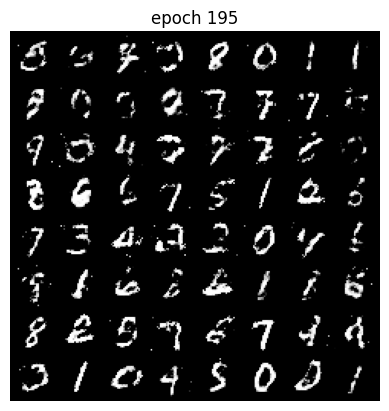

Epoch 195 of 200
Generator loss: 1.24408137, Discriminator loss: 1.10448227


118it [00:09, 11.87it/s]                         


Epoch 196 of 200
Generator loss: 1.26003896, Discriminator loss: 1.09320238


118it [00:09, 12.20it/s]                         


Epoch 197 of 200
Generator loss: 1.24128758, Discriminator loss: 1.08170691


118it [00:09, 12.21it/s]                         


Epoch 198 of 200
Generator loss: 1.28695734, Discriminator loss: 1.06481846


118it [00:09, 11.90it/s]                         


Epoch 199 of 200
Generator loss: 1.27958649, Discriminator loss: 1.07876292


118it [00:09, 12.24it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


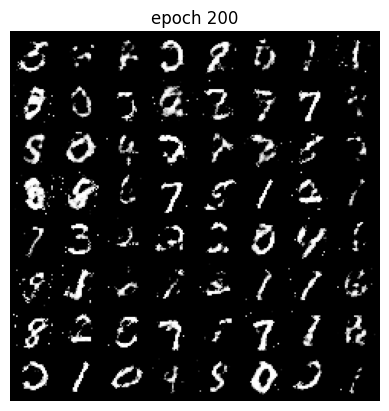

Epoch 200 of 200
Generator loss: 1.29684805, Discriminator loss: 1.07283509


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    
def discriminator_loss(output, true_label):
    #print(output.shape, true_label.shape)
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        image, _ = data
        image = image.to(device)
        for step in range(k):
            real_data = image
            
            optim_d.zero_grad()
            real_out = discriminator(real_data)
            real_labels = label_real(real_out.shape[0])
            real_loss = discriminator_loss(real_out, real_labels)
            
            fake_gen_data = generator(create_noise(batch_size, nz)).detach()
            fake_out = discriminator(fake_gen_data)
            fake_labels = label_fake(fake_gen_data.shape[0])
            fake_loss = discriminator_loss(fake_out, fake_labels)
            
            loss_d += real_loss.item()+fake_loss.item()
            real_loss.backward()
            fake_loss.backward()
            optim_d.step()
        
        optim_g.zero_grad()
        fake_gen_data = generator(create_noise(batch_size, nz))
        fake_out = discriminator(fake_gen_data)
        real_labels = label_real(batch_size)        
        gen_loss = generator_loss(fake_out, real_labels)
        
        loss_g += gen_loss.item()
        gen_loss.backward()
        optim_g.step()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

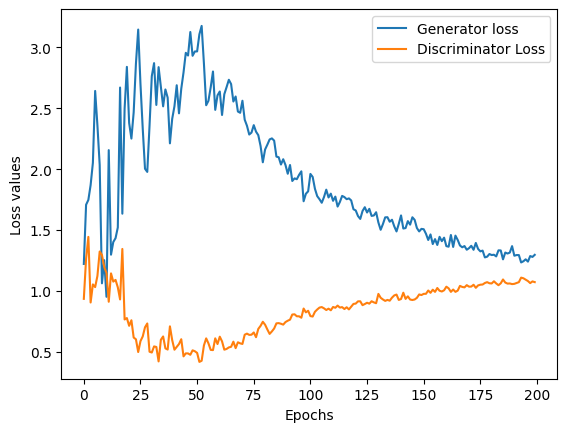

In [18]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss values")
plt.savefig('outputs/loss.png')